In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Transactions

In [2]:
train_df = pd.read_csv("./transactions_train.csv")

In [8]:
train_df.t_dat = pd.to_datetime(train_df.t_dat)

In [13]:
print(f"시간 범위: {train_df.t_dat.min().strftime('%Y-%m-%d')} ~ {train_df.t_dat.max().strftime('%Y-%m-%d')}")

시간 범위: 2018-09-20 ~ 2020-09-22


In [14]:
user_count = train_df.customer_id.nunique()
print(f"유저 수: {user_count:,}")

유저 수: 1,362,281


In [15]:
item_count = train_df.article_id.nunique()
print(f"유저 수: {item_count:,}")

유저 수: 104,547


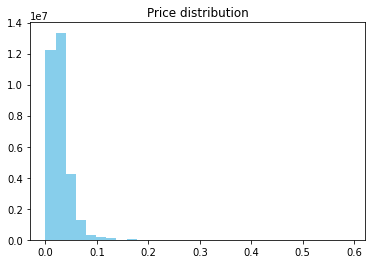

In [20]:
plt.hist(train_df.price, bins=30, color='skyblue')
plt.title("Price distribution")
plt.show()

In [23]:
train_df.sales_channel_id.value_counts()

2    22379862
1     9408462
Name: sales_channel_id, dtype: int64

In [54]:
## 중복 구매 존재 개많아~
train_df.groupby(["customer_id", "article_id"]).size().nlargest()

customer_id                                                       article_id
d00063b94dcb1342869d4994844a2742b5d62927f36843164fb3f818f630bca9  678342001     570
94665b46e194622ccdbcadc0170f13a2f8ede1ff6d057d43a19b8938c808b662  629420001     199
61da44a2758206d5701771f4315637b40c8321b511191654fb1430a6408e4dfa  507909001     188
ef38ec0f0cb29ee8bbb87efc82fd16f4b99127e3eeefe69c9b5fce627e93e270  570002001     170
5cba04ed9a3759bc02a8a9e01efccc07ce76c35c1a70dce6c5cedba32ce3ab6b  688558002     166
dtype: int64

In [56]:
train_df[
    (train_df.customer_id=="d00063b94dcb1342869d4994844a2742b5d62927f36843164fb3f818f630bca9") &
    (train_df.article_id==678342001)
]

,t_dat,customer_id,article_id,price,sales_channel_id
1177871,2018-10-14,d00063b94dcb1342869d4994844a2742b5d62927f36843...,678342001,0.006763,1
1177872,2018-10-14,d00063b94dcb1342869d4994844a2742b5d62927f36843...,678342001,0.006763,1
1177873,2018-10-14,d00063b94dcb1342869d4994844a2742b5d62927f36843...,678342001,0.006763,1
1177874,2018-10-14,d00063b94dcb1342869d4994844a2742b5d62927f36843...,678342001,0.006763,1
1177875,2018-10-14,d00063b94dcb1342869d4994844a2742b5d62927f36843...,678342001,0.006763,1
...,...,...,...,...,...
1178436,2018-10-14,d00063b94dcb1342869d4994844a2742b5d62927f36843...,678342001,0.006763,1
1178437,2018-10-14,d00063b94dcb1342869d4994844a2742b5d62927f36843...,678342001,0.006763,1
1178438,2018-10-14,d00063b94dcb1342869d4994844a2742b5d62927f36843...,678342001,0.006763,1
1178439,2018-10-14,d00063b94dcb1342869d4994844a2742b5d62927f36843...,678342001,0.006763,1


In [60]:
## 같은 날 한 고객이 같은 아이템을 샀는데 가격이 다르다?? 힝구리퐁퐁..
train_df[
    (train_df.customer_id=="d00063b94dcb1342869d4994844a2742b5d62927f36843164fb3f818f630bca9") &
    (train_df.article_id==678342001)
].value_counts().reset_index()

,t_dat,customer_id,article_id,price,sales_channel_id,0
0,2018-10-14,d00063b94dcb1342869d4994844a2742b5d62927f36843...,678342001,0.006763,1,569
1,2018-10-14,d00063b94dcb1342869d4994844a2742b5d62927f36843...,678342001,0.008695,1,1


In [69]:
unique_transaction_count = len(train_df[["customer_id", "article_id"]].drop_duplicates())
density = unique_transaction_count / (user_count * item_count)
print(f"Density: {density*100:.4f}%")

Density: 0.0192%


### Customer

In [24]:
customer_df = pd.read_csv("./customers.csv")

In [33]:
## customer_id에 중복 없음
assert customer_df.customer_id.nunique() == len(customer_df.customer_id)

In [26]:
user_count_meta = customer_df.customer_id.nunique()
print(f"유저 수: {user_count_meta:,}") ## 위에 보다 많음

유저 수: 1,371,980


In [35]:
customer_df.isna().mean()

customer_id               0.000000
FN                        0.652378
Active                    0.661508
club_member_status        0.004418
fashion_news_frequency    0.011669
age                       0.011561
postal_code               0.000000
dtype: float64

In [29]:
customer_df.FN.value_counts() ## T/F

1.0    476930
Name: FN, dtype: int64

In [30]:
customer_df.Active.value_counts() ## T/F

1.0    464404
Name: Active, dtype: int64

In [34]:
customer_df.club_member_status.value_counts()

ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64

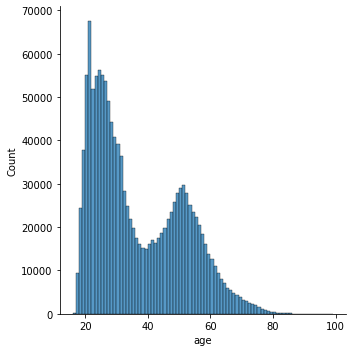

In [39]:
sns.displot(customer_df, x="age", binwidth=1)

In [40]:
customer_df.postal_code.value_counts()

2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c    120303
cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac5ec985080fd92243c8       261
714976379549eb90aae4a71bca6c7402cc646ae7c40f6c1cb91d4b5a18623fc1       159
7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5d1e4ba6a75456b96a7       157
5b7eb31eabebd3277de632b82267286d847fd5d44287ee150bb4206b48439145       156
                                                                     ...  
dde8b37eaf33f95306ac92c7a635f3862d057f4d40bd715b1e6954772efd8b9b         1
55ec64d8553e3fe4a00d5b196ab8e7d814b15725873abb675a2649bd7d18927a         1
3f953b63f8453a6a81e34dd182e2046b2bd70a0893cd12529ba2272345be702c         1
4d4db586b9810605ce6f70a30d47df882222f41e06722dadff58f853d49d3277         1
838e294d1d79c17c2b399a5f5d0ba67d67f4c521edc035190822c9cdb64c3787         1
Name: postal_code, Length: 352899, dtype: int64

### Articles

In [41]:
articles = pd.read_csv("articles.csv")

In [45]:
assert len(articles) == articles.article_id.nunique()

In [43]:
articles.product_code.value_counts()

783707    75
684021    70
699923    52
699755    49
685604    46
          ..
552405     1
763483     1
789977     1
792026     1
919553     1
Name: product_code, Length: 47224, dtype: int64

In [46]:
articles.prod_name.value_counts()

Dragonfly dress            98
Mike tee                   72
Wow printed tee 6.99       70
1pk Fun                    55
TP Paddington Sweater      54
                           ..
PQ VANESSA BLZ              1
Heather lace up(1)          1
PETITE Tanja maxi skirt     1
CE - Antibes sandal V6      1
Fiffi kickflare             1
Name: prod_name, Length: 45875, dtype: int64

In [49]:
articles.product_type_no.value_counts()

272    11169
265    10362
252     9302
255     7904
254     4155
       ...  
492        1
493        1
366        1
464        1
483        1
Name: product_type_no, Length: 132, dtype: int64

In [47]:
articles.product_type_name.value_counts()

Trousers      11169
Dress         10362
Sweater        9302
T-shirt        7904
Top            4155
              ...  
Towel             1
Bumbag            1
Wood balls        1
Headband          1
Sewing kit        1
Name: product_type_name, Length: 131, dtype: int64

In [51]:
## product_type에서 no과 name은 1:1 매칭아님 name이 같은 no있음
assert articles.groupby("product_type_no").product_type_name.nunique().max() == 1
# assert articles.groupby("product_type_name").product_type_no.nunique().max() == 1

AssertionError: 

In [52]:
articles.groupby("product_type_name").product_type_no.nunique().max()

2

In [48]:
articles

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.
